In [1]:
pip install numpy==1.21.6

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas==1.3.5

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imageio-ffmpeg==0.5.1

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install gym==0.22

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib==3.5.3


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install gym_minigrid==1.0.3

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install imageio-ffmpeg==0.5.1

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import os
import pandas as pd
import random
from collections import defaultdict
import gym
import gym_minigrid
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from collections import defaultdict
import numpy as np

class QLearning:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01  # Learning rate
        self.gamma = 0.9    # Discount factor
        self.epsilon = 0.2  # Exploration rate
        self.q_values = defaultdict(lambda: [0.0] * actions)

    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]

    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)

        q_value = self.q_values[state][action]

        ################## write code ################################
        # Get the maximum Q-value for the next state
        next_q_value = max(self.q_values[next_state])  
        
        # Compute the TD error
        td_error = reward + self.gamma * next_q_value - q_value
        
        # Update the Q-value for the current state and action
        self.q_values[state][action] += self.alpha * td_error
        ##############################################################
    
    def act(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        return action


In [10]:
from utils import gen_wrapped_env, show_video

In [11]:
!python3 utils.py

In [12]:
env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')

obs = env.reset()

agent_position = obs[0]

agent = QLearning(3, agent_position)

In [14]:
rewards = []
for ep in range(5000):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)

        agent.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
env.close()

episode: 20, rewards: 0
episode: 40, rewards: 0.5680000000000001
episode: 60, rewards: 0
episode: 80, rewards: 0.4959999999999999
episode: 100, rewards: 0
episode: 120, rewards: 0
episode: 140, rewards: 0.838
episode: 160, rewards: 0
episode: 180, rewards: 0.838
episode: 200, rewards: 0.73
episode: 220, rewards: 0.73
episode: 240, rewards: 0
episode: 260, rewards: 0.17199999999999993
episode: 280, rewards: 0
episode: 300, rewards: 0
episode: 320, rewards: 0.6579999999999999
episode: 340, rewards: 0
episode: 360, rewards: 0
episode: 380, rewards: 0
episode: 400, rewards: 0
episode: 420, rewards: 0
episode: 440, rewards: 0.6579999999999999
episode: 460, rewards: 0.838
episode: 480, rewards: 0
episode: 500, rewards: 0
episode: 520, rewards: 0.748
episode: 540, rewards: 0
episode: 560, rewards: 0.784
episode: 580, rewards: 0
episode: 600, rewards: 0.856
episode: 620, rewards: 0.838
episode: 640, rewards: 0.874
episode: 660, rewards: 0.532
episode: 680, rewards: 0.44199999999999995
episode:

In [15]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{0: [0.03591, 0.03582, 0.04015],
 3: [0.03229, 0.03238, 0.03694],
 12: [0.06365, 0.06374, 0.07088],
 24: [0.08437, 0.08473, 0.09556],
 27: [0.10944, 0.09882, 0.22622],
 39: [0.36317, 0.36092, 0.39958],
 15: [0.05046, 0.04499, 0.11092],
 6: [0.03414, 0.03389, 0.04091],
 36: [0.09784, 0.09766, 0.11886],
 30: [0.12324, 0.13746, 0.29273],
 33: [0.31158, 0.31751, 0.37407],
 21: [0.16025, 0.16062, 0.19216],
 18: [0.0586, 0.06441, 0.14],
 9: [0.04084, 0.0411, 0.04168],
 42: [0.48431, 0.48475, 0.52754],
 45: [0.0, 0.0, 0.0]}

In [16]:
show_video()

In [17]:
os.makedirs('./logs', exist_ok=True)
pd.Series(rewards).to_csv('./logs/rewards_qlearning.csv')

In [18]:
from collections import defaultdict
import numpy as np

class SARSA:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01  # Learning rate
        self.gamma = 0.9    # Discount factor
        self.epsilon = 0.2  # Exploration rate
        self.q_values = defaultdict(lambda: [0.0] * actions)

    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]

    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        
        q_value = self.q_values[state][action]

        ################ Write Code #####################
        # Get the Q-value for the next state-action pair
        next_q_value = self.q_values[next_state][next_action]  
        
        # Compute the TD error
        td_error = reward + self.gamma * next_q_value - q_value
        
        # Update the Q-value for the current state and action
        self.q_values[state][action] += self.alpha * td_error
        #################################################
    
    def act(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        return action


In [19]:
env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')
obs = env.reset()

agent_position = obs[0]

agent = SARSA(3, agent_position)

In [20]:
rewards = []
for ep in range(20000):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)

        agent.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
env.close()

episode: 20, rewards: 0
episode: 40, rewards: 0
episode: 60, rewards: 0
episode: 80, rewards: 0
episode: 100, rewards: 0
episode: 120, rewards: 0
episode: 140, rewards: 0
episode: 160, rewards: 0
episode: 180, rewards: 0
episode: 200, rewards: 0
episode: 220, rewards: 0
episode: 240, rewards: 0
episode: 260, rewards: 0
episode: 280, rewards: 0
episode: 300, rewards: 0
episode: 320, rewards: 0
episode: 340, rewards: 0.352
episode: 360, rewards: 0
episode: 380, rewards: 0.6759999999999999
episode: 400, rewards: 0.784
episode: 420, rewards: 0.55
episode: 440, rewards: 0
episode: 460, rewards: 0
episode: 480, rewards: 0.478
episode: 500, rewards: 0.856
episode: 520, rewards: 0
episode: 540, rewards: 0.784
episode: 560, rewards: 0
episode: 580, rewards: 0.55
episode: 600, rewards: 0.09999999999999998
episode: 620, rewards: 0
episode: 640, rewards: 0.6759999999999999
episode: 660, rewards: 0
episode: 680, rewards: 0
episode: 700, rewards: 0.838
episode: 720, rewards: 0
episode: 740, rewards:

In [21]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{0: [0.02611, 0.02623, 0.03145],
 12: [0.04818, 0.04822, 0.05413],
 24: [0.06594, 0.06624, 0.07717],
 36: [0.08409, 0.08452, 0.10545],
 3: [0.02495, 0.02503, 0.02615],
 6: [0.02887, 0.02913, 0.03277],
 18: [0.08428, 0.09228, 0.13304],
 27: [0.13606, 0.14523, 0.19461],
 15: [0.0645, 0.06231, 0.08614],
 30: [0.18967, 0.17792, 0.28841],
 9: [0.03142, 0.03169, 0.03774],
 21: [0.13561, 0.13588, 0.16969],
 39: [0.33982, 0.33997, 0.36706],
 33: [0.29578, 0.29552, 0.35773],
 45: [0.0, 0.0, 0.0],
 42: [0.46261, 0.46029, 0.51454]}

In [22]:
show_video()

In [23]:
os.makedirs('./logs', exist_ok=True)
pd.Series(rewards).to_csv('./logs/rewards_sarsa.csv')

In [24]:
sarsa_logs = pd.read_csv('./logs/rewards_sarsa.csv', index_col=False).iloc[:, 1]
q_logs = pd.read_csv('./logs/rewards_qlearning.csv', index_col=False).iloc[:, 1]

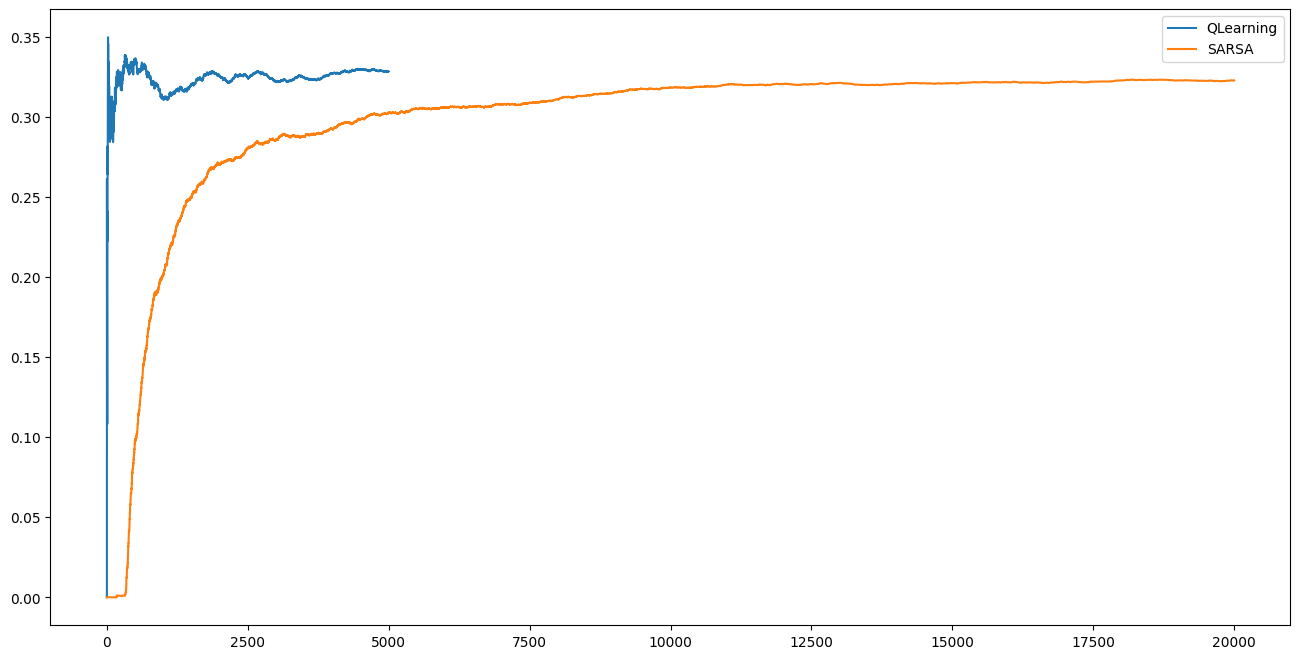

In [25]:
plt.figure(figsize=(16, 8))
plt.plot(q_logs.cumsum() / (pd.Series(np.arange(q_logs.shape[0]))+1), label="QLearning")
plt.plot(sarsa_logs.cumsum() / (pd.Series(np.arange(sarsa_logs.shape[0]))+1), label="SARSA")
plt.legend()